# Reconocimiento de Personajes de Los Simpson con CNN y CRISP-DM 

**Integrantes:**
- Eyleen Collado
- Victoria Saavedra

**Profesor:**
- Giocrisrai Godoy

## 1. Comprensión del negocio

**Objetivo del proyecto:**  
Clasificar correctamente personajes de la serie "Los Simpson" a partir de imágenes utilizando redes neuronales convolucionales (CNN) con la metodología CRISP-DM en imágenes y videos.

**Problema:**  
Dado un conjunto de imágenes etiquetadas de personajes, construir un modelo capaz de predecir correctamente el personaje presente en una imagen desconocida.


## 2. Comprensión de los Datos

In [6]:
# Importaciones

import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import shutil


In [7]:
# Ruta a la carpeta principal (ajusta si es necesario)
base_path = r'C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_dataset'

# Listado de carpetas (personajes)
characters = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

# Contar imágenes por personaje
data = {'character': [], 'image_count': []}

for char in characters:
    path = os.path.join(base_path, char)
    img_count = len([img for img in os.listdir(path) if img.endswith(('.jpg', '.png', '.jpeg'))])
    data['character'].append(char)
    data['image_count'].append(img_count)

df_counts = pd.DataFrame(data).sort_values('image_count', ascending=False)
df_counts.reset_index(drop=True, inplace=True)
df_counts.head(50)

,character,image_count
0,homer_simpson,2246
1,ned_flanders,1454
2,moe_szyslak,1452
3,lisa_simpson,1354
4,bart_simpson,1342
5,marge_simpson,1291
6,krusty_the_clown,1206
7,principal_skinner,1194
8,charles_montgomery_burns,1193
9,milhouse_van_houten,1079


podemos observar cuantas imágenes tenemos disponibles por cada uno de los personajes de los simpsons en el dataset base en el directorio simpsons_dataset

In [9]:
csv_path = r'C:\Users\UsuarioCompuElite\Downloads\simpsons\number_pic_char.csv'

df_csv = pd.read_csv(csv_path)
print(df_csv.head(50))

    Unnamed: 0                      name  total  train  test  bounding_box
0            0             Homer Simpson   2246   1909   337           612
1            1              Ned Flanders   1454   1236   218           595
2            2               Moe Szyslak   1452   1234   218           215
3            3              Lisa Simpson   1354   1151   203           562
4            4              Bart Simpson   1342   1141   201           554
5            5             Marge Simpson   1291   1097   194           557
6            6          Krusty The Clown   1206   1025   181           226
7            7         Principal Skinner   1194   1015   179           506
8            8  Charles Montgomery Burns   1193   1014   179           650
9            9       Milhouse Van Houten   1079    917   162           210
10          10              Chief Wiggum    986    838   148           209
11          11    Abraham Grampa Simpson    913    776   137           595
12          12           

In [10]:
print("Columnas disponibles:", df_csv.columns.tolist())

Columnas disponibles: ['Unnamed: 0', 'name', 'total', 'train', 'test', 'bounding_box']


| Columna        | Descripción                                                            |
| -------------- | ---------------------------------------------------------------------- |
| `Unnamed: 0`   | Índice generado automáticamente al guardar el CSV. No es relevante.    |
| `name`         | Nombre del personaje.                                                  |
| `total`        | Total de imágenes disponibles.                                         |
| `train`        | Cantidad de imágenes usadas para entrenamiento.                        |
| `test`         | Cantidad de imágenes destinadas a prueba.                              |
| `bounding_box` | Parece indicar si existen anotaciones tipo *bounding box* (detección). |


In [12]:
print("\nTotal de personajes:", df_csv.shape[0])
# Revisión de personajes con más y menos imágenes
print("\nPersonaje con más imágenes:", df_csv.loc[df_csv['total'].idxmax()])
print("\nPersonaje con menos imágenes:", df_csv.loc[df_csv['total'].idxmin()])




Total de personajes: 47

Personaje con más imágenes: Unnamed: 0                  0
name            Homer Simpson
total                    2246
train                    1909
test                      337
bounding_box              612
Name: 0, dtype: object

Personaje con menos imágenes: Unnamed: 0               42
name            Jimbo Jones
total                     0
train                     0
test                      0
bounding_box              0
Name: 42, dtype: object


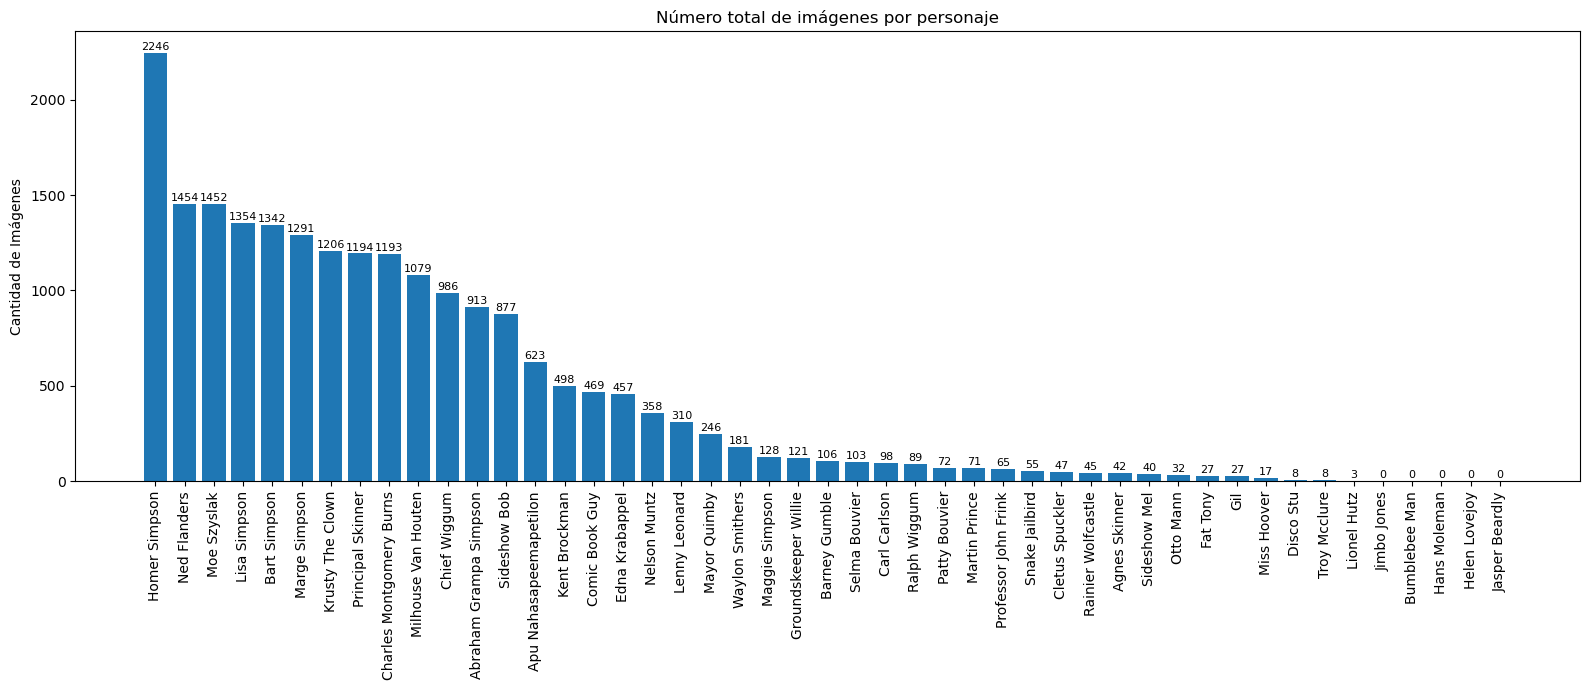

In [13]:
# Ordenamos el DataFrame por cantidad total
df_sorted = df_csv.sort_values('total', ascending=False)

plt.figure(figsize=(16, 7))
bars = plt.bar(df_sorted['name'], df_sorted['total'])
plt.xticks(rotation=90)
plt.ylabel('Cantidad de Imágenes')
plt.title('Número total de imágenes por personaje')

# Agregamos las etiquetas con el conteo encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [14]:
annotation_file = r'C:\Users\UsuarioCompuElite\Downloads\simpsons\annotation.txt'

# Mostrar las primeras líneas para entender su estructura
with open(annotation_file, 'r', encoding='utf-8') as file:
    lines = file.readlines()

print("Primeras 10 líneas del archivo:")
for line in lines[:10]:
    print(line.strip())

Primeras 10 líneas del archivo:
./characters/abraham_grampa_simpson/pic_0000.jpg,57,72,52,72,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0001.jpg,80,31,337,354,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0002.jpg,128,48,285,407,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0003.jpg,72,126,158,275,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0004.jpg,123,61,294,416,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0005.jpg,115,18,498,413,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0006.jpg,171,47,423,413,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0007.jpg,120,53,381,409,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0008.jpg,149,56,398,406,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0009.jpg,205,41,470,456,abraham_grampa_simpson


podemos observar que cada linea sigue la siguiente estructura:
 - <ruta_imagen>,x1,y1,x2,y2,nombre_personaje

Donde: 

- ruta_imagen: es la ruta relativa a la imagen.
- x1, y1, x2, y2: son las coordenadas del bounding box (esquinas superior izquierda y inferior derecha).
- nombre_personaje: es la etiqueta (clase).

Para poder visualizar mejor los datos, y así utilizarlo para mejorar la detección de imágenes lo convertiremos en un dataframe. 

In [16]:
annotation_file = r'C:\Users\UsuarioCompuElite\Downloads\simpsons\annotation.txt'

# Leer el archivo con separador coma
df_annotations = pd.read_csv(annotation_file, header=None, names=['path', 'x1', 'y1', 'x2', 'y2', 'character'])

print(df_annotations.head())


                                               path   x1   y1   x2   y2  \
0  ./characters/abraham_grampa_simpson/pic_0000.jpg   57   72   52   72   
1  ./characters/abraham_grampa_simpson/pic_0001.jpg   80   31  337  354   
2  ./characters/abraham_grampa_simpson/pic_0002.jpg  128   48  285  407   
3  ./characters/abraham_grampa_simpson/pic_0003.jpg   72  126  158  275   
4  ./characters/abraham_grampa_simpson/pic_0004.jpg  123   61  294  416   

                character  
0  abraham_grampa_simpson  
1  abraham_grampa_simpson  
2  abraham_grampa_simpson  
3  abraham_grampa_simpson  
4  abraham_grampa_simpson  


## 3. Preparación de los Datos

In [18]:

# Ruta base donde están las imágenes reales
img_base = r'C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_dataset'

# Crear carpeta para los recortes
output_base = r'C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_recortes'
os.makedirs(output_base, exist_ok=True)

# Leer anotaciones
df_annotations = pd.read_csv(annotation_file, header=None, names=['path', 'x1', 'y1', 'x2', 'y2', 'character'])

# Crear la carpeta destino si no existe
os.makedirs(output_base, exist_ok=True)

# 1. Copiar todas las imágenes originales
print("Copiando imágenes originales...")
for personaje in os.listdir(img_base):
    carpeta_origen = os.path.join(img_base, personaje)
    carpeta_destino = os.path.join(output_base, personaje)
    os.makedirs(carpeta_destino, exist_ok=True)

    for archivo in os.listdir(carpeta_origen):
        origen = os.path.join(carpeta_origen, archivo)
        destino = os.path.join(carpeta_destino, archivo)

        if os.path.isfile(origen):
            try:
                shutil.copy2(origen, destino)
            except Exception as e:
                print(f"Error copiando {origen}: {e}")

# 2. Recortar imágenes anotadas
print("Procesando recortes...")
errores = []

for index, row in df_annotations.iterrows():
    personaje = row['character']
    nombre_img = os.path.basename(row['path'])  # pic_XXXX.jpg
    img_path = os.path.join(output_base, personaje, nombre_img)

    if not os.path.exists(img_path):
        errores.append((img_path, "Imagen no encontrada"))
        continue

    try:
        # Abrir imagen
        img = Image.open(img_path)
        # Recortar
        cropped = img.crop((row['x1'], row['y1'], row['x2'], row['y2']))
        # Sobrescribir imagen original
        cropped.save(img_path)
    except Exception as e:
        errores.append((img_path, str(e)))

print("Proceso terminado.")
print(f"Errores encontrados: {len(errores)}")

# Guardar log de errores
df_errores = pd.DataFrame(errores, columns=['ruta', 'error'])
df_errores.to_csv(os.path.join(output_base, 'errores_recorte.csv'), index=False)

Copiando imágenes originales...
Procesando recortes...
Proceso terminado.
Errores encontrados: 45


In [19]:
# Mostrar primeros errores
for e in errores[:50]:
    print(e)

('C:\\Users\\UsuarioCompuElite\\Downloads\\simpsons\\simpsons_recortes\\abraham_grampa_simpson\\pic_0000.jpg', "Coordinate 'right' is less than 'left'")
('C:\\Users\\UsuarioCompuElite\\Downloads\\simpsons\\simpsons_recortes\\abraham_grampa_simpson\\pic_0020.jpg', "Coordinate 'lower' is less than 'upper'")
('C:\\Users\\UsuarioCompuElite\\Downloads\\simpsons\\simpsons_recortes\\abraham_grampa_simpson\\pic_0066.jpg', "Coordinate 'lower' is less than 'upper'")
('C:\\Users\\UsuarioCompuElite\\Downloads\\simpsons\\simpsons_recortes\\abraham_grampa_simpson\\pic_0260.jpg', "Coordinate 'right' is less than 'left'")
('C:\\Users\\UsuarioCompuElite\\Downloads\\simpsons\\simpsons_recortes\\abraham_grampa_simpson\\pic_0321.jpg', "Coordinate 'right' is less than 'left'")
('C:\\Users\\UsuarioCompuElite\\Downloads\\simpsons\\simpsons_recortes\\abraham_grampa_simpson\\pic_0831.jpg', "Coordinate 'right' is less than 'left'")
('C:\\Users\\UsuarioCompuElite\\Downloads\\simpsons\\simpsons_recortes\\bart_sim

In [20]:
original_path = r'C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_dataset'
recorte_path = r'C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_recortes'

def contar_imagenes_por_personaje(path):
    data = []
    for personaje in os.listdir(path):
        carpeta = os.path.join(path, personaje)
        if os.path.isdir(carpeta):
            total = len([f for f in os.listdir(carpeta) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
            data.append({'character': personaje, 'count': total})
    return pd.DataFrame(data)

# Rutas
original_path = r'C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_dataset'
recorte_path = r'C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_recortes'

# Conteo
df_original = contar_imagenes_por_personaje(original_path)
df_recortes = contar_imagenes_por_personaje(recorte_path)

# Comparación
df_comparacion = df_original.merge(df_recortes, on='character', suffixes=('_original', '_recorte'))
df_comparacion['diferencia'] = df_comparacion['count_original'] - df_comparacion['count_recorte']
df_comparacion_sorted = df_comparacion.sort_values('diferencia', ascending=False)
df_comparacion_sorted.head(50)


,character,count_original,count_recorte,diferencia
0,abraham_grampa_simpson,913,913,0
32,principal_skinner,1194,1194,0
24,mayor_quimby,246,246,0
25,milhouse_van_houten,1079,1079,0
26,miss_hoover,17,17,0
27,moe_szyslak,1452,1452,0
28,ned_flanders,1454,1454,0
29,nelson_muntz,358,358,0
30,otto_mann,32,32,0
31,patty_bouvier,72,72,0



[CHARLES_MONTGOMERY_BURNS] - 1 imagen(es) extra:



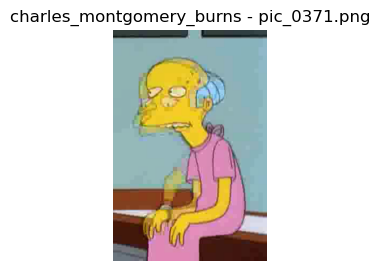


[KRUSTY_THE_CLOWN] - 2 imagen(es) extra:



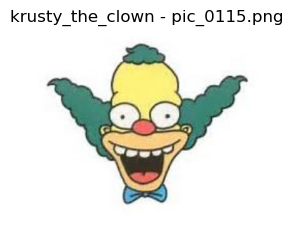

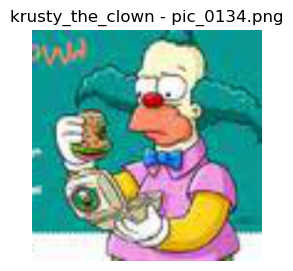

In [21]:
# Personajes con diferencias
personajes_con_extras = ['charles_montgomery_burns', 'krusty_the_clown']

# Función para detectar imágenes extra
def imagenes_extra(carpeta_original, carpeta_recorte, personaje):
    path_ori = os.path.join(carpeta_original, personaje)
    path_rec = os.path.join(carpeta_recorte, personaje)

    imgs_ori = set(os.listdir(path_ori))
    imgs_rec = set(os.listdir(path_rec))

    return list(imgs_rec - imgs_ori)

# Mostrar imágenes extra por personaje
for personaje in personajes_con_extras:
    extras = imagenes_extra(original_path, recorte_path, personaje)
    print(f"\n[{personaje.upper()}] - {len(extras)} imagen(es) extra:\n")

    for i, img_name in enumerate(extras):
        img_path = os.path.join(recorte_path, personaje, img_name)

        try:
            img = Image.open(img_path)
            plt.figure(figsize=(3, 3))
            plt.imshow(img)
            plt.title(f"{personaje} - {img_name}")
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"No se pudo abrir {img_name}: {e}")

In [22]:
def contar_imagenes_por_personaje(path):
    data = []
    for personaje in os.listdir(path):
        carpeta = os.path.join(path, personaje)
        if os.path.isdir(carpeta):
            total = len([f for f in os.listdir(carpeta) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
            data.append({'character': personaje, 'image_count': total})
    return pd.DataFrame(data)

df_final = contar_imagenes_por_personaje(recorte_path)
df_final = df_final.sort_values('image_count', ascending=False).reset_index(drop=True)

print(df_final)

                   character  image_count
0              homer_simpson         2246
1               ned_flanders         1454
2                moe_szyslak         1452
3               lisa_simpson         1354
4               bart_simpson         1342
5              marge_simpson         1291
6           krusty_the_clown         1208
7   charles_montgomery_burns         1194
8          principal_skinner         1194
9        milhouse_van_houten         1079
10              chief_wiggum          986
11    abraham_grampa_simpson          913
12              sideshow_bob          877
13    apu_nahasapeemapetilon          623
14             kent_brockman          498
15            comic_book_guy          469
16            edna_krabappel          457
17              nelson_muntz          358
18             lenny_leonard          310
19              mayor_quimby          246
20           waylon_smithers          181
21            maggie_simpson          128
22      groundskeeper_willie      

In [23]:

# Ruta al dataset recortado
base_path = r'C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_recortes'

errores = []

for personaje in os.listdir(base_path):
    carpeta = os.path.join(base_path, personaje)
    if not os.path.isdir(carpeta):
        continue

    for nombre_img in os.listdir(carpeta):
        ruta_img = os.path.join(carpeta, nombre_img)
        try:
            with Image.open(ruta_img) as img:
                img.verify()  # Verifica sin cargar completamente
        except Exception as e:
            errores.append({'character': personaje, 'image': nombre_img, 'error': str(e)})
            print(f"❌ Imagen no válida: {ruta_img}")

❌ Imagen no válida: C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_recortes\charles_montgomery_burns\pic_0371.jpg
❌ Imagen no válida: C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_recortes\krusty_the_clown\pic_0115.jpg
❌ Imagen no válida: C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_recortes\krusty_the_clown\pic_0134.jpg


In [24]:
for err in errores:
    path = os.path.join(base_path, err['character'], err['image'])
    try:
        os.remove(path)
        print(f"🗑️ Imagen eliminada: {path}")
    except Exception as e:
        print(f"Error eliminando {path}: {e}")


🗑️ Imagen eliminada: C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_recortes\charles_montgomery_burns\pic_0371.jpg
🗑️ Imagen eliminada: C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_recortes\krusty_the_clown\pic_0115.jpg
🗑️ Imagen eliminada: C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_recortes\krusty_the_clown\pic_0134.jpg


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ruta base
dataset_dir = r'C:\Users\UsuarioCompuElite\Downloads\simpsons\simpsons_recortes'

# Parámetros
img_size = (96, 96)
batch_size = 32

# Generador con augmentación
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

# Generadores
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 16764 images belonging to 43 classes.
Found 4169 images belonging to 43 classes.


## 4. Modelado

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),

    Dense(train_generator.num_classes, activation='softmax')  # Salida multiclase
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,408,747 (13.00 MB)

 Trainable params: 3,408,747 (13.00 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath=r'C:\Users\UsuarioCompuElite\Downloads\simpsons\weights.best.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint]
)

model.load_weights(r'C:\Users\UsuarioCompuElite\Downloads\simpsons\weights.best.keras')


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.2633 - loss: 2.6927
Epoch 1: val_accuracy improved from -inf to 0.44063, saving model to C:\Users\UsuarioCompuElite\Downloads\simpsons\weights.best.keras
524/524 ━━━━━━━━━━━━━━━━━━━━ 55s 103ms/step - accuracy: 0.2636 - loss: 2.6919 - val_accuracy: 0.4406 - val_loss: 2.1852
Epoch 2/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5782 - loss: 1.5637
Epoch 2: val_accuracy improved from 0.44063 to 0.56225, saving model to C:\Users\UsuarioCompuElite\Downloads\simpsons\weights.best.keras
524/524 ━━━━━━━━━━━━━━━━━━━━ 52s 100ms/step - accuracy: 0.5783 - loss: 1.5635 - val_accuracy: 0.5622 - val_loss: 1.6976
Epoch 3/20
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6802 - loss: 1.1546
Epoch 3: val_accuracy improved from 0.56225 to 0.58575, saving model to C:\Users\UsuarioCompuElite\Downloads\simpsons\weights.best.keras
524/524 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.6802 - loss: 1.1545 - val_accuracy


KeyboardInterrupt



In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(train_generator.num_classes, activation='softmax')  # Salida multiclase
])

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    filepath=r'C:\Users\UsuarioCompuElite\Downloads\simpsons\modelo_best_2.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

earlystop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

In [ ]:
history = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[checkpoint, earlystop]
)

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
# --------------------- Parámetros ---------------------
img_size = (96, 96)
batch_size = 32
epochs = 50
lr = 1e-4


datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


In [ ]:
from tensorflow.keras.optimizers import Adam
# ------------------ Modelo CNN ------------------------
model3 = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(96, 96, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(512, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0005)),
    Dense(train_generator.num_classes, activation='softmax')
])

# ------------------ Compilación -----------------------
optimizer = Adam(learning_rate=lr)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ------------------ Callbacks -------------------------
checkpoint3 = ModelCheckpoint(
    filepath=r'C:\Users\UsuarioCompuElite\Downloads\simpsons\modelo_optimo.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)


# ------------------ Entrenamiento ---------------------
history = model3.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[checkpoint3, earlystop]
)

In [ ]:
import matplotlib.pyplot as plt

# --- Precisión ---
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión por época')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# --- Pérdida ---
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida por época')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Contar imágenes por personaje
def contar_imagenes(path):
    data = []
    for personaje in os.listdir(path):
        carpeta = os.path.join(path, personaje)
        if os.path.isdir(carpeta):
            total = len([f for f in os.listdir(carpeta) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
            data.append({'character': personaje, 'count': total})
    return pd.DataFrame(data).sort_values('count', ascending=False).reset_index(drop=True)

df_conteo = contar_imagenes(base_path)
top20 = df_conteo.head(20)['character'].tolist()
print("Top 20 personajes:", top20)

In [ ]:
# Eliminar carpetas fuera del top 20
for personaje in os.listdir(base_path):
    if personaje not in top20:
        carpeta = os.path.join(base_path, personaje)
        try:
            os.system(f'rmdir /s /q "{carpeta}"')  # para Windows
        except Exception as e:
            print(f"Error al eliminar {personaje}: {e}")


In [ ]:
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)
